# Pasos de un proyecto de ML

Todo proceso de ML tiene pasos bien definidos, que se pueden seguir para la mayoría de los casos que se nos presenten. Estos pasos son:

1. Entender el problema.
2. Obtener los datos.
3. Analizar y visualizar los datos para obtener ideas.
4. Preparar los datos para los algoritmos de ML.
5. Seleccionar un modelo y entrenarlo.
6. Ajustar el modelo.
7. Presentar tu solución.
8. Lanzar, monitorear y mantener tu sistema.

## Trabajar con datos reales

Los datos reales presentan desafíos que no se ven en datos generados de forma sintética, por lo que es importante, aun en una etapa de aprendizaje, utilizar datasets que provengan de fuentes reales.

En internet hay una serie de fuentes de datos que nos pueden servir para tal propósito, entre ellos podemos considerar:

- El [Repositorio de ML de la Universidad de Irvine](http://archive.ics.uci.edu/ml/).
- Los datasets en [Kaggle](https://www.kaggle.com/datasets).
- Los datasets de [Amazon AWS](https://registry.opendata.aws/).
- Lista de [Wikipedia](http://homl.info/9) de datasets para ML.
- Lista de [Quora](http://homl.info/10) de datasets públicos para ML.
- Hilos sobre datasets en [Reddit](https://www.reddit.com/r/datasets).
- Portales donde se listan datos públicos como [http://dataportals.org](http://dataportals.org), [http://opendatamonitor.eu](http://opendatamonitor.eu) o [http://quandl.com](http://quandl.com).

Para comenzar a trabajar tomaremos el dataset _California Housing Prices_ del repositorio _Statlib_ que se basa en los datos del censo de 1990.

## 1. Entender el problema

1. Definir los objetivos del negocio.
2. ¿Para que será usada tu solución?
3. ¿Como es la solución actual? (si existe)
4. ¿Como atacaremos el problema? (supervisado/no-supervisado, online/offline, etc)
5. ¿Como se mide la performance de mi solución?
6. ¿Esta mi medida de performance alineada con los objetivos del negocio?
7. ¿Cual es el mínimo aceptable para cumplir con los objetivos del negocio?
8. ¿Existen problemas similares?¿Puedo reusar experiencia o herramientas?
9. ¿Tengo a disposición expertos humanos?
10. ¿Como se resuelve el problema manualmente?
11. Haz una lista de tus suposiciones o las de otros respecto al problema.
12. Verifica las suposiciones si es posible.

Nuestro problema actual se define en función de una corredora de propiedades de California que desea saber el precio promedio en cada distrito, para saber cuando es conveniente invertir en la compra de un inmueble. Un distrito es la unidad mínima en los censos de EEUU y representa un bloque/cuadra donde viven entre 600 a 3000 personas. Para este problema, se considera nuestra solución como la entrada de otro sistema que estima las oportunidades de inversión. Actualmente estas estimaciones se hacen a mano por expertos humanos, lo que es costoso en tiempo y dinero, siendo además los resultados poco satisfactorios porque muchas veces las estimaciones tienen un error de más del 10%.

A partir de los datos presentados, podrías estimar si el problema es:

- ¿Supervisado, no-supervisado o reforzado?
- ¿Es un problema de clasificación, de regresión u otra cosa?
- ¿Necesitamos una técnica de aprendizaje online u offline?

### Seleccionar las medidas de performance

Raiz del error cuadrático medio (Root Mean Square Error): 
$$RMSE(X,h)=\sqrt{\frac{1}{m} \sum_{i=1}^m{(h(x^i)-y^i)}^2}$$
Donde:

- $m$ es el número de instancias.
- $x^i$ son las variables independientes.
- $y^i$ son las variables dependientes.
- $h(x^i)$ es la función de predicción evaluada en $x^i$.

Si bien esta medida de performance es de las preferidas para problemas de regresión, tiene problemas cuando existen muchos _outliers_.

Para ese caso, también vamos a calcular el Error absoluto medio (Mean Absolute Error):
$$MAE(X,h)=\frac{1}{m} \sum_{i=1}^m{\lvert h(x^i)-y^i \rvert}$$

Ambas medidas son maneras de medir la distancia entre dos vectores, el vector de predicciones y el de objetivos. De esta manera se ajustan a nuestro problema que es claramente un problema de regresión.

## 2. Obtener los datos

1. Haz un listado de los datos que necesitas y su importancia.
2. Busca y documenta de donde puedes obtener los datos.
3. Revisa cuanto espacio van a ocupar.
4. Revisa las obligaciones legales y pide los permisos necesarios.
5. Obten permisos de acceso.
6. Crea un espacio de trabajo (environment) con suficiente espacio.
7. Obten los datos.
8. Convierte los datos a un formato facil de manipular.
9. Asegurate que la información sensible es borrada o está protegida.
10. Revisa el tamaño y el tipo de los datos.
11. Crea un set de prueba, dejalo aparte y no lo veas jamás.

En un entorno real los datos se encuentran en bases de datos, planillas de cálculo, tablas, documentos de texto, etc. Con fines didácticos nuestro trabajo es mucho mas simple, los datos se encuentran en un archivo comprimido (_housing.tgz_), que contiene un archivo CSV con los datos del censo (_housing.csv_). Todos estos se encuentran dentro del repositorio github de [handsom_ml](https://github.com/ageron/handson-ml), bajo el directorio _datasets/housing_.

In [1]:
import os
import tarfile

HOUSING_PATH=os.path.join("datasets", "housing")

def fetch_housing_data(housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        print("Error: Directorio no encontrado.")
        return -1
    
    tgz_path=os.path.join(housing_path, "housing.tgz")
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
!rm datasets/housing/housing.csv
!ls datasets/housing

fetch_housing_data()

!ls datasets/housing

housing=load_housing_data()
housing.head()

README.md   housing.tgz
README.md   housing.csv housing.tgz


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Tarea

A partir de los datos rescatados en el dataframe _housing_ obtenga la cantidad de elementos no-nulos para cada columna, los estadísticos descriptivos y un histograma que integre todas las columnas numéricas. Para ello se le proporciona un formulario de la librería Pandas que puede descargar <a href="files/Pandas_Cheat_Sheet.pdf">AQUI</a>.

In [4]:
housing.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


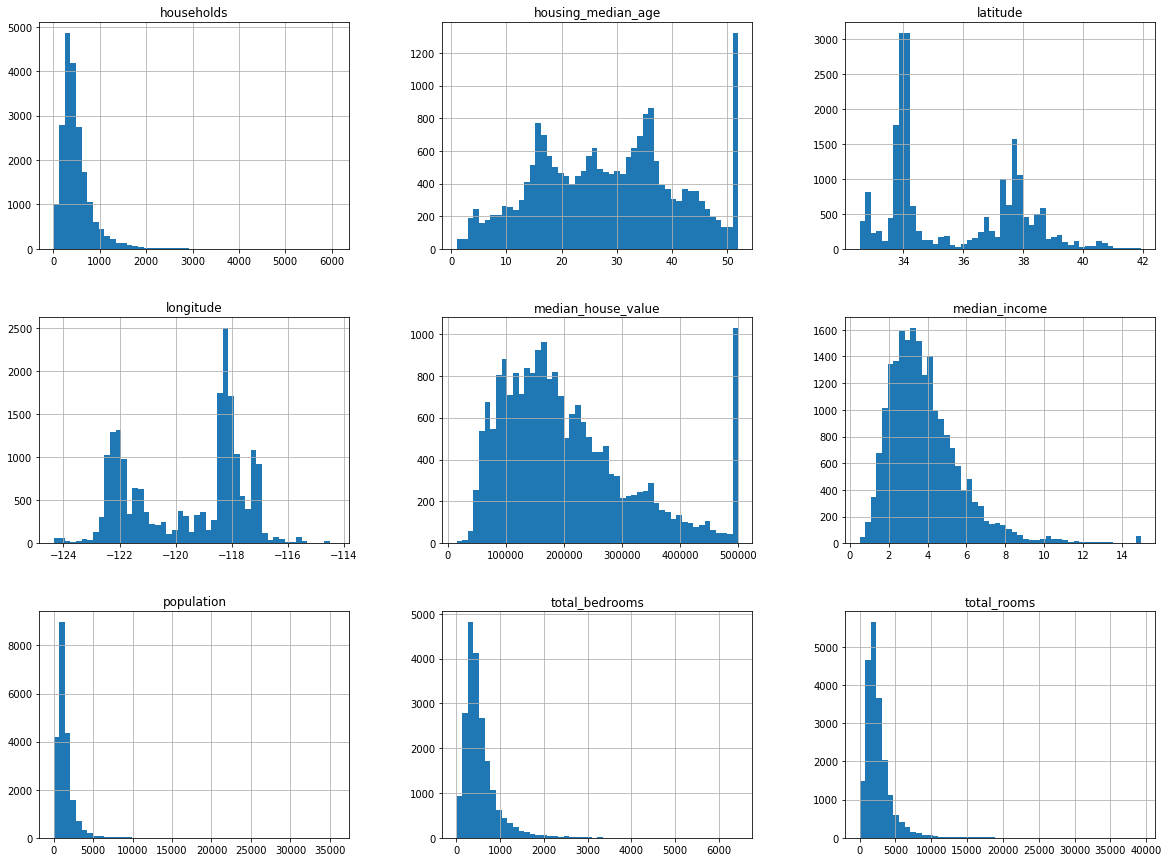

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Crear un set de prueba

Scikit-Learn tiene algunas funciones para realizar de forma automatizada la creación de un set de prueba. Para ello contamos con *train_test_split* que entre otros parámetros recibe el *dataframe*, el tamaño en porcentaje del set de prueba (*test_size*) y la semilla para la función aleatoria (*random_state*).

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(housing.size, train_set.size, test_set.size, train_set.size+test_set.size)

206400 165120 41280 206400


Lo anteriormente descrito presenta algunas interrogantes:
1. ¿Por que debemos proveer la semilla de la función aleatoria?
2. ¿Es nuestro dataset lo suficientemente representativo siempre con este modo de particionamiento?

**Respuestas:**
1. Nuestro análisis debe ser reproducible para cada persona que quiera ver si funciona, por ello una semilla definida le dará como resultado los mismos set de prueba y entrenamiento que a nosotros. Un análisis que no es replicable no es util. Recordar, cada análisis es dependiente del set de datos.
2. No. Existen muchas veces en que una de las características es dominante y define en gran medida los datos de entrada, sumado a un *dataset* demasiado pequeño, podría hacer que ciertos regularidades se pierdan por no estar correctamente representadas. 

Para los casos en que el *dataset* es muy pequeño con una característica muy dominante tenemos una función que toma cada estrato y obtiene un set de prueba representativo. Esta función es *StratifiedShuffleSplit*, su funcionamiento es similar a *train_test_split*, recibiendo los mismo parametros, pero además debemos proveer un *dataframe* con las categorías y su peso. Vamos a suponer que un especialista nos dice que el ingreso medio (*median_income* en el dataset) es muy importante.

3.0    0.350581
2.0    0.318847
5.0    0.218459
4.0    0.072287
1.0    0.039826
Name: income_cat, dtype: float64


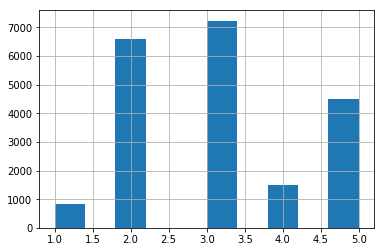

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["median_income"] < 5, 5.0, inplace=True)

housing["income_cat"].hist()

print(housing["income_cat"].value_counts() / housing["income_cat"].size)

plt.show()

3.0    0.350533
2.0    0.318798
5.0    0.218508
4.0    0.072432
1.0    0.039729
Name: income_cat, dtype: float64


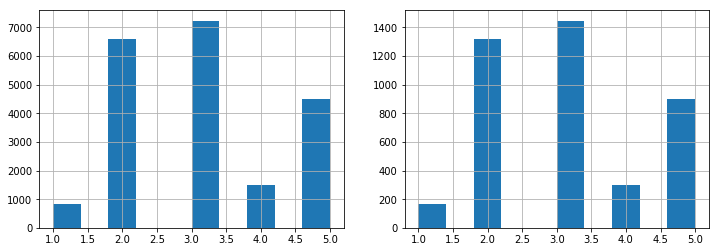

In [9]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
    
fig, axs = plt.subplots(1,2)
housing["income_cat"].hist(ax=axs[0], figsize=(12, 4))
strat_test_set["income_cat"].hist(ax=axs[1], figsize=(12, 4))

print(strat_test_set["income_cat"].value_counts() / strat_test_set["income_cat"].size)

plt.show()

## 3. Analizar y visualizar los datos para obtener ideas.

1. Crea una copia de los datos para exploración (obten una muestra mas pequeña si es necesario).
2. Crea una bitacora para mantener los hayazgos de tu exploración (por ejemplo un Jupyter Notebook).
3. Estudia cada atributo y sus caracteristicas.
    - Nombre
    - Tipo
    - Valores nulos
    - Ruido
    - Se puede usar para esta tarea?
    - Tipo de distribución (gausiana, uniforme, logartimica, etc.).
4. Para aprendizaje supervisado, identifica el atributo dependiente.
5. Visualiza los datos.
6. Estudia las correlaciones entre atributos.
7. Identifíca si necesitas mas datos.
8. Documenta lo que haz aprendido de los datos (Jupyter de nuevo).


Ahora que tenemos separado nuestro dataset en prueba y entrenamiento, es momento de dejar a un lado nuestro set de entrenamiento y no manipularlo de ninguna manera. Como se recomienda es bueno obtener un set de exploración, que es un subconjunto del set de entrenamiento, este set de exploración puede ser inclusive del mismo tamaño del set de entrenamiento. 

En nuestro caso, dado que el set de datos usado es muy pequeño, usaremos todo el set de entrenamiento como set de exploración.

In [10]:
housing = strat_train_set.copy()

Parte importante de nuestro análisis exploratorio es conocer de que se tratan nuestros datos, en este punto la ayuda de un experto del area de los datos es de gran ayuda.

Dentro de nuestros datos podemos ver que tenemos una longitud y una latitud, usaremos estos datos para explorar que obtenemos.

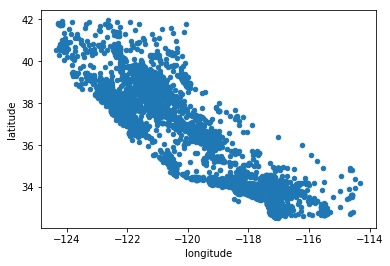

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Podemos detectar que efectivamente, los puntos trazan una figura regular, sospechosamente familiar.

![](assets/mapa-california-small.jpg)

Aun así es dificil detectar las areas mas densamente pobladas. Para obtener una mejor visualización le daremos un canal alpha a cada punto de 0.1 (10\%):

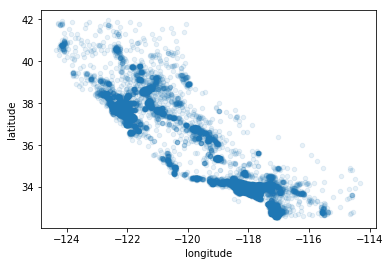

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Para seguir obteniendo información, agregaremos un par de dimensiones mas al analisis, la densidad poblacional (representada por el radio de cada punto) y el precio (representado por el color). Para el radio usamos el parametro *s* y para el color el parametro *c*. 

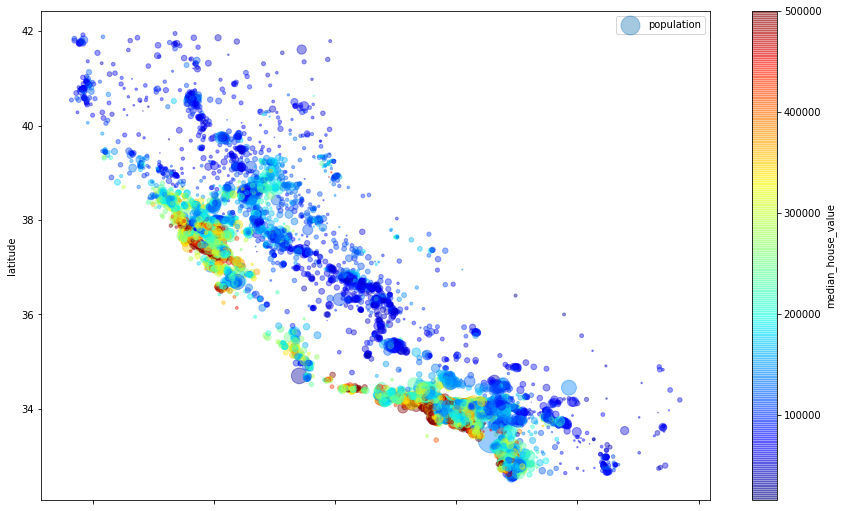

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/50, label="population", figsize=(15,9),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar="True")
plt.legend()

### Búsqueda de correlaciones

Como el dataset no es muy grande, podemos calcular el coeficiente de correlación estandar (*Pearson*).

In [15]:
corr_matrix=housing.corr()

print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687752
income_cat            0.620944
total_rooms           0.136422
housing_median_age    0.106985
households            0.066340
total_bedrooms        0.050081
population           -0.024622
longitude            -0.047586
latitude             -0.142814
Name: median_house_value, dtype: float64


Otra forma de ver la correlación es a través de una matriz de dispersión, para ello contamos con una función en la librería *Pandas*.

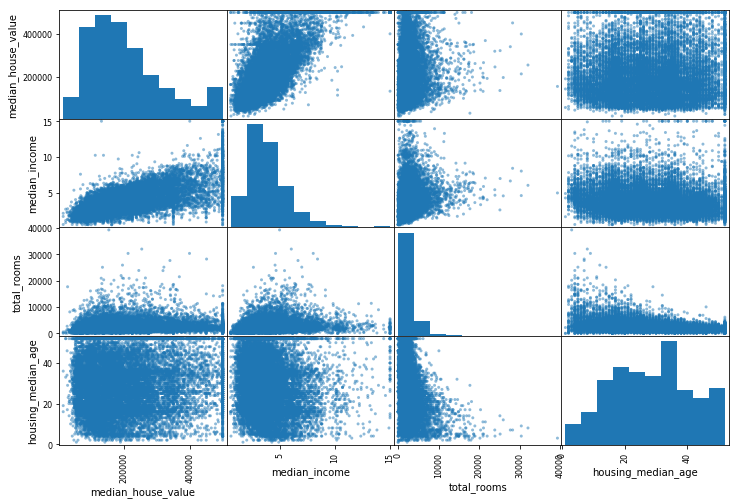

In [17]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

plt.show()

Las columnas *median_house_value* y *median_income* parecen ser candidatos prometedores a una buena correlación. La gráficamos de forma separada para verla en detalle.

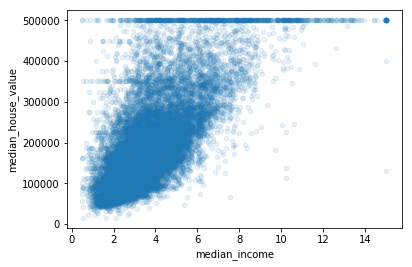

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### ¿Podemos obtener nuevas relaciones a partir de nuestro conocimiento?

In [19]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
income_cat            float64
dtype: object

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17172,-122.26,37.38,28.0,1103.0,164.0,415.0,154.0,7.8633,500001.0,NEAR OCEAN,5.0
5293,-118.43,34.07,38.0,3251.0,656.0,1251.0,593.0,7.7382,500001.0,<1H OCEAN,5.0
14663,-117.12,32.80,29.0,2863.0,534.0,1392.0,522.0,3.8719,174200.0,NEAR OCEAN,3.0
13986,-117.06,34.87,14.0,3348.0,619.0,1756.0,557.0,3.5987,91400.0,INLAND,3.0
16896,-122.36,37.58,37.0,3325.0,734.0,1468.0,692.0,4.0987,434000.0,NEAR OCEAN,3.0


Dado que la información esta a nivel de distritos tenemos la cantidad total de habitaciones (*total_rooms*) y la cantidad total de casas (*households*), para un análisis individual no parece ser muy relevante, por lo que sería mas util intentar sacar un promedio de habitaciones por casa.

In [21]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]

corr_matrix=housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value     1.000000
median_income          0.687752
income_cat             0.620944
rooms_per_household    0.145300
total_rooms            0.136422
housing_median_age     0.106985
households             0.066340
total_bedrooms         0.050081
population            -0.024622
longitude             -0.047586
latitude              -0.142814
Name: median_house_value, dtype: float64


### Tarea

Determine 3 nuevas relaciones, obtenga sus coeficientes de *Pearson* y la respectiva matriz de dispersión.
**OJO**, para ganar espacio en la gráfica elimine las columnas menos prometedoras.